# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Read in HTML tables into a DataFrame
mars_temps = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Print DataFrame
mars_tempdf = mars_temps[0] 
mars_tempdf.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [6]:
# Examine data type of each column
mars_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [7]:
# Change data types for data analysis
mars_tempdf['terrestrial_date'] = mars_tempdf['terrestrial_date'].apply(pd.to_datetime)
mars_tempdf['id'].astype('object')

0          2
1         13
2         24
3         35
4         46
        ... 
1862    1889
1863    1892
1864    1894
1865    1893
1866    1895
Name: id, Length: 1867, dtype: object

In [8]:
# Confirm type changes were successful by examining data types again
mars_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [9]:
# 1. How many months are there on Mars?
months = mars_tempdf['month'].nunique()
months

12

In [10]:
# 2. How many Martian days' worth of data are there? Since 'sol' are equivalent to Martial days,
# I just count the unique values in that column, which also happens to be the same as the lenght of the df. 
mars_tempdf['sol'].nunique()

1867

In [11]:
# 3. What is the average low temperature by month?
# First GroupBy month, then use the agg function for getting the average temperature by month
bymonth_df = mars_tempdf.groupby('month')
lowtemp_average = bymonth_df['min_temp'].agg('mean')

lowtemp_average

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

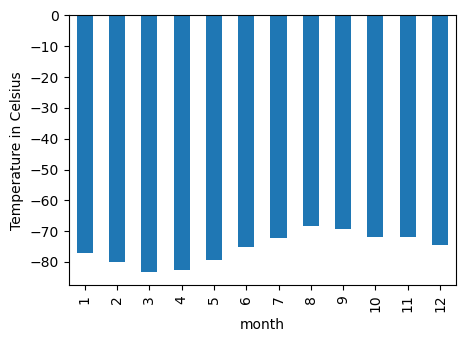

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the average temperature by month
lowtemp_average.plot(kind="bar", figsize=(5, 3.5))

# Set a title for the chart
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

plt.show()
plt.tight_layout()

In [14]:
# Identify the coldest and hottest months in Curiosity's location
lower_temp = lowtemp_average.min()
highest_temp = lowtemp_average.max()

print(f'The coldest month in Mars averages {lower_temp}, while the hottest month averages {highest_temp}')

The coldest month in Mars averages -83.30729166666667, while the hottest month averages -68.38297872340425


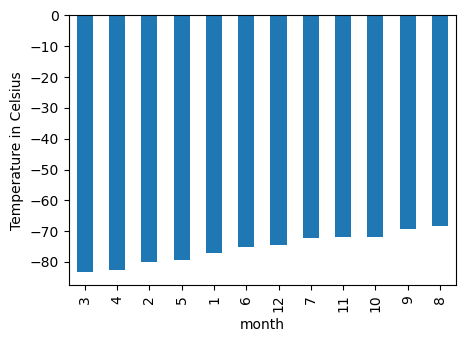

<Figure size 640x480 with 0 Axes>

In [15]:
# Sort from lower to higher temperature to identify the months visually
cold_tohot = lowtemp_average.sort_values()

cold_tohot.plot(kind="bar", figsize=(5, 3.5))

# Set a title for the chart
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

plt.show()
plt.tight_layout()

In [16]:
# 4. Average pressure by Martian month
pressure_average = bymonth_df['pressure'].agg('mean')

pressure_average

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

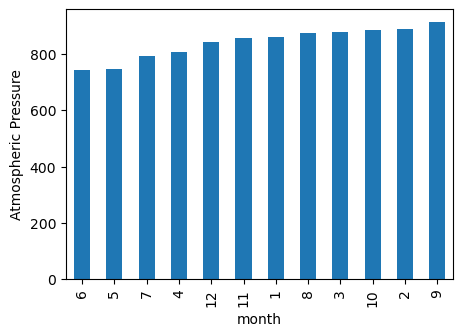

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the average pressure by month
pressure_average.sort_values().plot(kind="bar", figsize=(5, 3.5))

# Set a title for the chart
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")

plt.show()
plt.tight_layout()

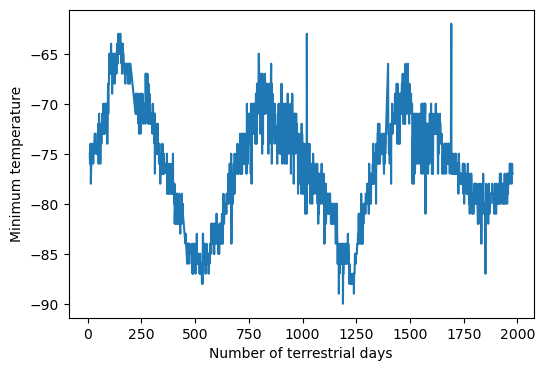

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_tempdf.plot(x='sol', y='min_temp', figsize=(6,4), legend=False)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature');


There are 12 months in Mars. In this datata set, there are 1867 Martian days worth of data.
The coldest month in Mars is the third, which average temperature in Celsius is -83.31.
The 'hottest' month in Mars is the eighth, which average temperature in Celsius is -68.38.
The month with lowest atmospheric pressure is the sixth, in average 745.05.
The month with highest atmospheric pressure is the nineth, in average 913.31.

Tp find out how many terrestrial days exist in a Martian year, we can look at the peaks or the valleys of the daily temperature chart. For example, the second valley happens around day 1200, and the first valley happens around day 500. Then, the distance between the valleys of the graph is approximately 700 terrestrial days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_tempdf.to_csv("../Resources/mars_temperatures.csv", encoding='utf8', index=False)

In [22]:
browser.quit()